This script works on extracted velocities along a profile line based on the 'Profile_Line' tool in QGIS. Data were exported as csv files. Velocities are plotted along a profile line for a particular month and all available years (Part 1). Velocity differences to a reference year (e.g. year without volcanic activity) for a particular month and all available years can also be plotted (Part 2). 
With the help of this script, Fig 6.14 and Figure 1 (Appendix) were generated.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Part 1: Surface velocities along a profile line

set data path and month

In [2]:
month = 'January'
month_number = '01'


path='path_to_extracted_profile_line_data_(from QGIS Profile Line Tool) (csv files)'.format(month)

This step includes plotting of surface velocities ('veloc') along a profile line for all available years.
The loop does this for all years and a particular month (e.g. January, see above)

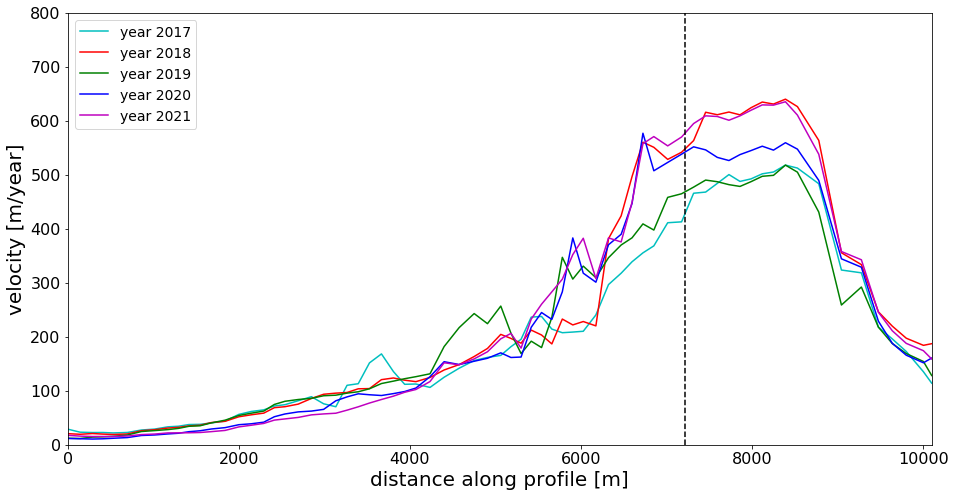

In [3]:

# control figure plotting
fig=plt.figure()
ax = fig.add_axes([0.1,0.1,2,1.5])

# make DataFrame of colors used for plotting
color_dict = {'year': [2017,2018,2019,2020,2021] , 'colour': ['c', 'r', 'g','b','m']}
color_data = pd.DataFrame(color_dict)
color_data = color_data.set_index('year')

# make list of all available years
years=[2017,2018,2019,2020,2021]

# plot surface velocity data for a particular month and a particular year. 
# The loop does this for all available years (and a fix month).

for year in years:
    #load velocity dataset
    file='veloc_along_profile_{}_{}.csv'.format(month_number,year)
    path_join=os.path.join(path,file)
    veloc = pd.read_csv(path_join,header=None,names=['DIST','velocity'])
    veloc =veloc.drop_duplicates(subset=['DIST'])
    
    # plot velocity along profile
    ax.plot(veloc['DIST'],veloc['velocity'],color=color_data.loc[year][0],label='year %s' % year)

plt.xlim([0,max(veloc['DIST'])])
plt.ylim([0,800])
plt.xlabel('distance along profile [m]',fontsize=20)
plt.ylabel('velocity [m/year]',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(loc='upper left',prop={'size': 14})

# plot equilibrium line position
eq_position = 7211.4
plt.axvline(x=eq_position,linestyle='--',color='k')


plt.show()

Part 2: Surface velocity differences to reference year along profile line

set data path, month and reference year 'fix_year'

In [4]:
month = 'January'
month_number = '01'
fix_year = 2020

path='path_to_extracted_profile_line_data_(from QGIS Profile Line Tool)'.format(month)

This step includes subtraction of the surface velocity of the reference year ('veloc_fix_year') from the surface velocity
of the other years ('veloc') in 'veloc_diff'. The loop does this for all years and a particular month 
(e.g. January 2017 minus January 2020, then January 2018 minus January 2020, then January 2019 minus January 2020).
In the example above, the reference dataset is from January 2020.

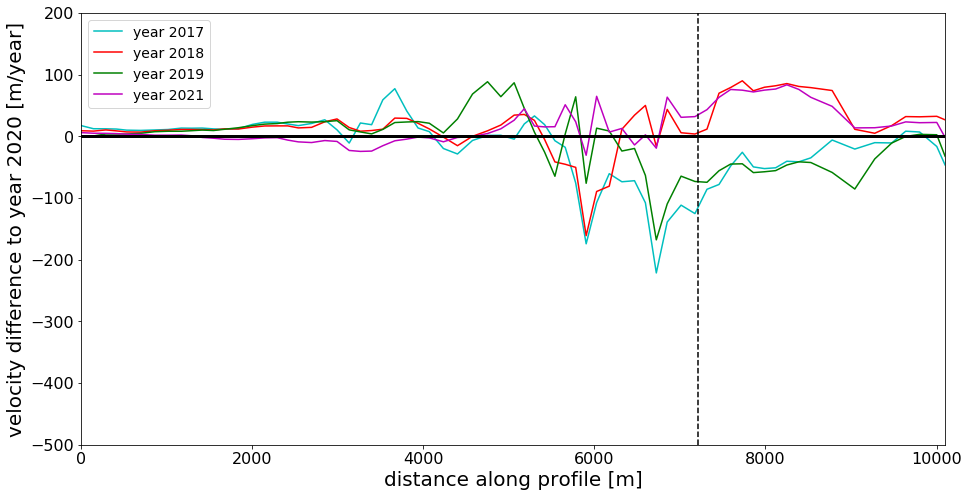

In [5]:
# control figure plotting
fig=plt.figure()
ax = fig.add_axes([0.1,0.1,2,1.5])

# make DataFrame of colors used for plotting
color_dict = {'year': [2017,2018,2019,2020,2021] , 'colour': ['c', 'r', 'g','b','m']}
color_data = pd.DataFrame(color_dict)
color_data = color_data.set_index('year')

# set all available years and exclude reference year from list
years=[2017,2018,2019,2020,2021]
years.remove(fix_year)

#reference year dataset
file_fix_year='veloc_along_profile_{}_{}.csv'.format(month_number,fix_year)                
path_join_fix_year=os.path.join(path,file_fix_year)
veloc_fix_year = pd.read_csv(path_join_fix_year,header=None,names=['DIST','velocity'])
veloc_fix_year=veloc_fix_year.drop_duplicates(subset=['DIST'])

# subtract surface velocity data for a particular month and a particular year from
# the same month of the reference year. The loop does this for all years
# (excluding the reference year, which would result in zero difference).

for year in years:
    #velocity dataset
    file='veloc_along_profile_{}_{}.csv'.format(month_number,year)
    path_join=os.path.join(path,file)
    veloc = pd.read_csv(path_join,header=None,names=['DIST','velocity'])
    veloc =veloc.drop_duplicates(subset=['DIST'])
  
    # calculate differences
    veloc_diff = pd.DataFrame()
    veloc_diff['veloc_diff'] = veloc['velocity'] - veloc_fix_year['velocity']
    
    # plot velocity differences along profile with the color specified in color_data
    plt.plot(veloc['DIST'],veloc_diff,color=color_data.loc[year][0],label='year %s' % year)
    
plt.xlabel('distance along profile [m]',fontsize=20)
plt.ylabel('velocity difference to year {} [m/year]'.format(fix_year),fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0,max(veloc['DIST'])])
plt.ylim([-500,200])
ax.legend(loc='upper left',prop={'size': 14})


# plot thick black line
zero_array = np.zeros(len(veloc['DIST']))
ax.plot(veloc['DIST'],zero_array,color='k',linewidth=3)

# plot equilibrium line position of Cone Glacier
eq_position = 7211.4
plt.axvline(x=eq_position,linestyle='--',color='k')

plt.show()